In [39]:
%run C:/Users/admin/Desktop/EeD/Python/Project/Preprocessing.ipynb

[8.84375802e-03 1.93231952e-02 1.96880627e-02 1.52941548e-02
 1.15901631e-02 1.60271778e-02 1.67726102e-02 1.26983695e-02
 1.51851246e-02 4.50166127e-03 1.90191540e-02 1.80098240e-02
 1.75651137e-02 1.03363879e-02 1.25341449e-03 2.06861017e-02
 9.72945548e-03 2.27559162e-03 7.44725968e-03 7.71004924e-03
 1.19898039e-02 2.19825143e-03 1.61555493e-02 1.09059546e-02
 1.67058192e-02 9.30820095e-03 1.88540023e-02 1.50660901e-02
 1.41338980e-02 6.90634548e-03 2.68770957e-03 5.56155292e-03
 2.89779299e-04 3.23109538e-03 1.86824732e-02 1.80523954e-02
 3.83520380e-04 1.54850004e-03 1.38153330e-03 3.79596391e-03
 4.22663088e-03 4.71269738e-04 4.54415194e-04 1.69552891e-03
 1.59284667e-03 7.24694487e-03 2.50107330e-03 1.03076083e-03
 7.99043678e-03 2.20523659e-03 2.35135514e-03 1.32812381e-03
 3.19150942e-03 2.79133011e-04 1.13500724e-04 6.42704405e-03
 2.96301003e-03 3.13440566e-03 5.38354915e-04 9.11150460e-03
 2.33062954e-03 2.32571812e-03 1.10376150e-03 9.23287813e-04
 1.13675443e-04 6.779581

In [40]:
ah_data_target = ah_data['SalePrice']
ah_data_sf = pd.get_dummies(ah_data_sf)
ah_data_sf.shape

(2919, 58)

In [41]:
#handling multicollinearity
ah_data_sf = ah_data[selected_features]
ah_data_sf = pd.get_dummies(ah_data_sf)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF_Factors"] = [variance_inflation_factor(ah_data_sf.values, i) for i in range(ah_data_sf.shape[1])]
vif["Features"] = ah_data_sf.columns

#vif["VIF_Factors"] = vif["VIF_Factors" != float('Inf')]
vif["VIF_Factors"] = vif["VIF_Factors"].replace(np.inf,0)
#alternative - vif.dropna(subset=["VIF_Factors"], how="all", with_inf=True)

#Getting  the names of features with np.inf VIF
vif_inf = vif.drop(vif[vif.VIF_Factors != 0].index)
vif_inf.Features.unique()
vif_inf_features_list = ['MoSold', 'BsmtCond_Fa', 'BsmtCond_Gd', 'BsmtCond_Po',
       'BsmtCond_TA', 'BsmtExposure_Av', 'BsmtExposure_Gd',
       'BsmtExposure_Mn', 'BsmtExposure_No', 'BsmtFinType1_ALQ',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf', 'HeatingQC_Ex',
       'HeatingQC_Fa', 'HeatingQC_Gd', 'HeatingQC_Po', 'HeatingQC_TA',
       'LotConfig_Corner', 'LotConfig_CulDSac', 'LotConfig_FR2',
       'LotConfig_FR3', 'LotConfig_Inside', 'LotShape_IR1',
       'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg',
       'MasVnrType_BrkCmn', 'MasVnrType_BrkFace', 'MasVnrType_None',
       'MasVnrType_Stone']
#Eliminating the np.inf features
vif = vif.drop(vif[vif.VIF_Factors == 0].index)
#Eliminating features with VIF >10
vif = vif.drop(vif[vif.VIF_Factors > 10].index)
#checking which features to keep in addition to inf features droppeds earlier
vif.Features.unique()
vif_features_tokeep = ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFullBath', 'BsmtUnfSF',
       'Fireplaces', 'GarageArea', 'GarageCars', 'GarageYrBlt', 'LotArea',
       'LotFrontage', 'MSSubClass', 'MasVnrArea', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'TotRmsAbvGrd', 'WoodDeckSF',
       'YearBuilt', 'YearRemodAdd', 'YrSold']
all_features_to_keep = vif_features_tokeep + vif_inf_features_list
#modifying the dataframe to keep only selected features
ah_data_sf = ah_data_sf[all_features_to_keep]
ah_data_sf.head(10)
ah_data_sf.shape

C:\Users\admin\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


(2919, 54)

In [61]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model as lm1
from sklearn import metrics
#from sklearn.linear_model import Ridge
#from sklearn.linear_model import Lasso
#from sklearn.linear_model import ElasticNet
lm = linear_model.LinearRegression()

#split train and test data
X_train, X_test, y_train, y_test = train_test_split(ah_data_sf, ah_data_target, test_size = 0.75, random_state = 10) 


#fit the multiple linear regression model
lm.fit(X_train, y_train)

#make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
print("Train MSE: ", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE: ", metrics.mean_squared_error(y_train, y_train_pred))
print("Train R2 Score: ", metrics.r2_score(y_train,y_train_pred))
print("Test MSE: ", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Test R2 Score: ", metrics.r2_score(y_test,y_test_pred))

Train MSE:  29725.95047994477
Train RMSE:  1680163695.624448
Train R2 Score:  0.4148480700516528
Test MSE:  31968.93799051077
Test RMSE:  45454.31159955462
Test R2 Score:  0.36374687752574364


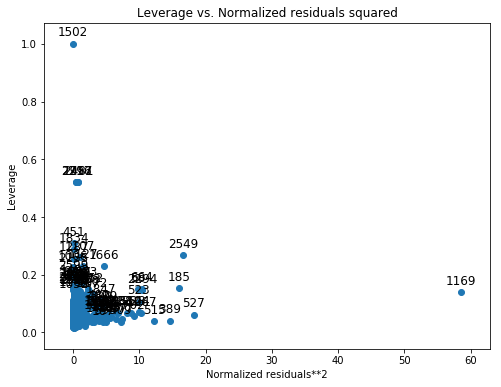

In [63]:
# lets plot the normalized residual vs leverage
import matplotlib.pyplot as plt
import statsmodels.api as sm
lm1 = sm.OLS(y_train, X_train).fit()
from statsmodels.graphics.regressionplots import plot_leverage_resid2
%matplotlib inline
fig, ax = plt.subplots(figsize=(8,6))
fig = plot_leverage_resid2(lm1, ax = ax)

In [82]:
# Find outliers 
# Bonferroni outlier test
test = lm1.outlier_test()
test['bonf(p)']
#print ('Bad data points (bonf(p) < 0.05):')
print (test[test['bonf(p)'] < 0.05])
ah_data_sf.drop([185,2549,1169,527])
ah_data_target.drop([185,2549,1169,527])

      student_resid       unadj_p       bonf(p)
185        4.255549  2.377662e-05  1.733316e-02
2549      -4.671829  3.598207e-06  2.623093e-03
1169       8.373982  3.169734e-16  2.310736e-13
527        4.309678  1.876068e-05  1.367653e-02


0       208500
1       181500
2       223500
3       140000
4       250000
5       143000
6       307000
7       200000
8       129900
9       118000
10      129500
11      345000
12      144000
13      279500
14      157000
15      132000
16      149000
17       90000
18      159000
19      139000
20      325300
21      139400
22      230000
23      129900
24      154000
25      256300
26      134800
27      306000
28      207500
29       68500
30       40000
31      149350
32      179900
33      165500
34      277500
35      309000
36      145000
37      153000
38      109000
39       82000
40      160000
41      170000
42      144000
43      130250
44      141000
45      319900
46      239686
47      249700
48      113000
49      127000
50      177000
51      114500
52      110000
53      385000
54      130000
55      180500
56      172500
57      196500
58      438780
59      124900
60      158000
61      101000
62      202500
63      140000
64      219500
65      317000
66      18

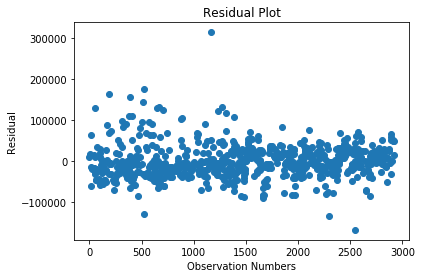

(array([8.56189084e-08, 4.85173814e-07, 4.96589669e-06, 1.08450617e-05,
        3.59599415e-06, 5.42253087e-07, 2.28317089e-07, 2.85396361e-08,
        0.00000000e+00, 2.85396361e-08]),
 array([-166900.41979535, -118835.96285958,  -70771.50592382,
         -22707.04898806,   25357.4079477 ,   73421.86488347,
         121486.32181923,  169550.77875499,  217615.23569076,
         265679.69262652,  313744.14956228]),
 <a list of 10 Patch objects>)

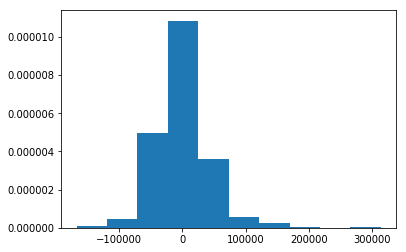

In [85]:
#homscedasticity
plt.plot(lm1.resid,'o')
plt.title('Residual Plot')
plt.ylabel('Residual')
plt.xlabel('Observation Numbers')
plt.show()
plt.hist(lm1.resid, normed=True)

In [84]:
#fitting Ridge Regression Model
lr = linear_model.Ridge(alpha = 0.001)
lr.fit(X_train, y_train)

#make predictions and evaluate
y_train_pred2 = lr.predict(X_train)
y_test_pred2 = lr.predict(X_test)
print("Train MSE: ", metrics.mean_absolute_error(y_train, y_train_pred2))
print("Train RMSE: ", metrics.mean_squared_error(y_train, y_train_pred2))
print("Train R2 Score: ", metrics.r2_score(y_train,y_train_pred2))
print("Test MSE: ", metrics.mean_absolute_error(y_test, y_test_pred2))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)))
print("Test R2 Score: ", metrics.r2_score(y_test,y_test_pred2))


Train MSE:  29725.955801449058
Train RMSE:  1680163698.8831024
Train R2 Score:  0.41484806891675874
Test MSE:  31968.840529341647
Test RMSE:  45454.2042913072
Test R2 Score:  0.3637498816467827


In [49]:
#fitting the LASSO Regression Model
ls = linear_model.Lasso(alpha = 0.001)
ls.fit(X_train, y_train)
#make predictions and evaluate
y_train_pred3 = ls.predict(X_train)
y_test_pred3 = ls.predict(X_test)
print("Train MSE: ", metrics.mean_absolute_error(y_train, y_train_pred3))
print("Train RMSE: ", metrics.mean_squared_error(y_train, y_train_pred3))
print("Train R2 Score: ", metrics.r2_score(y_train,y_train_pred3))
print("Test MSE: ", metrics.mean_absolute_error(y_test, y_test_pred3))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3)))
print("Test R2 Score: ", metrics.r2_score(y_test,y_test_pred3))


Train MSE:  29725.949755281978
Train RMSE:  1680163695.626501
Train R2 Score:  0.41484807005093793
Test MSE:  31968.934544004725
Test RMSE:  45454.30859487436
Test R2 Score:  0.3637469616426101


C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [51]:
en = linear_model.ElasticNet(alpha = 0.1, l1_ratio = 0.5)
en.fit(X_train, y_train)
#make predictions and evaluate
y_train_pred4 = en.predict(X_train)
y_test_pred4 = en.predict(X_test)
print("Train MSE: ", metrics.mean_absolute_error(y_train, y_train_pred4))
print("Train RMSE: ", metrics.mean_squared_error(y_train, y_train_pred4))
print("Train R2 Score: ", metrics.r2_score(y_train,y_train_pred4))
print("Test MSE: ", metrics.mean_absolute_error(y_test, y_test_pred4))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred4)))
print("Test R2 Score: ", metrics.r2_score(y_test,y_test_pred4))


Train MSE:  29740.363119824582
Train RMSE:  1700448062.9715657
Train R2 Score:  0.40778361750345293
Test MSE:  31668.131431561615
Test RMSE:  45185.28131445885
Test R2 Score:  0.37125616750268964


In [46]:
mae_train = [metrics.mean_absolute_error(y_train, y_train_pred), metrics.mean_absolute_error(y_train, y_train_pred2), metrics.mean_absolute_error(y_train, y_train_pred3)]

mae_test = [metrics.mean_absolute_error(y_test, y_test_pred),metrics.mean_absolute_error(y_test, y_test_pred2),metrics.mean_absolute_error(y_test, y_test_pred3)]

rmse_test = [np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)), np.sqrt(metrics.mean_squared_error(y_test, y_test_pred2)), np.sqrt(metrics.mean_squared_error(y_test, y_test_pred3))]

df = {"MAE_train": mae_train, "MAE_test": mae_test, "RMSE_test":rmse_test}

evaluation_table = pd.DataFrame(data = df)
mapper = {0:"Linear", 1:"Ridge", 2:"Lasso"}
evaluation_table.rename(mapper = mapper, axis='index', copy=True, inplace=True)
evaluation_table

,MAE_train,MAE_test,RMSE_test
Linear,29725.950480,31968.937991,45454.311600
Ridge,29725.955801,31968.840529,45454.204291
Lasso,29725.949755,31968.934544,45454.308595
